# Percursos em Grafos
## Busca em Largura (BFS, do inglês *Breadth First Search*)
*Universidade Federal de Lavras  
Departamento de Ciência da Computação  
GCC218 - Algoritmos em Grafos  
Professor: Mayron Moreira*

## BFS

Considere um grafo $G=(V,E)$ não-ponderado qualquer e a seguinte tarefa: determinar o menor número de arestas que percorremos de uma fonte $s$ aos vértices $V \backslash \{s\}$.

### Definição do problema

* **Problema do Menor Caminho em Grafos Não-Ponderados**
    * **Instância**: um grafo não ponderado qualquer, e um vértice origem (fonte) $s$.  
    * **Saída**: um grafo que contenha o menor número de arestas que conecta à fonte $s$.
    
Esse problema pode ser resolvido através do Algoritmo de Busca em Largura, comumente referenciado por BFS (devido as suas iniciais em inglês). A partir dos vértices de uma camada, a BFS explora todos os vértices ainda não alcançados da camada posterior, até que não haja vértices a serem visitados. Para tanto, o algoritmo utilizada a estrutura de dados **fila**. Vejamos um exemplo de implementação da BFS.

### Grafo de teste

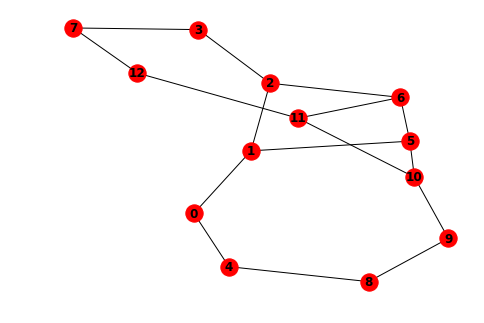

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
n = 13 # Número de vértices do grafo exemplo

# Adicionando os vértices em G
for i in range(n):
    G.add_node(i)

# Acrescentando suas arestas
G.add_edge(0, 1)
G.add_edge(0, 4)
G.add_edge(1, 2)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(2, 6)
G.add_edge(3, 7)
G.add_edge(4, 8)
G.add_edge(5, 6)
G.add_edge(5, 10)
G.add_edge(6, 11)
G.add_edge(7, 12)
G.add_edge(8, 9)
G.add_edge(9, 10)
G.add_edge(10, 11)
G.add_edge(11, 12)

# Desenho de G
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

### Algoritmo

In [3]:
# Nosso infinito
INFINITO = 100000

'''
As cores identificarao de o vertice foi ou nao visitado.
Notacao:
B - vertice ainda nao descoberto (Branco)
C - vertice descoberto que esta na fila (Cinza)
P - vertice que ja fora visitado (Preto)
''' 
cor = ['B' for i in range(n)]

# Pai de cada vertice na BFS
pai = [-1 for i in range(n)]

# Distancia do vertice em relacao ao vertice de origem
dist = [INFINITO for i in range(n)]

'''
Parametros:
grafo - corresponde a uma estrutura de dados em grafo
s - vertice de origem
'''
def BFS(grafo, s):
    # Inicializando o vertice origem
    dist[s] = 0
    cor[s] = 'C'
    
    # Fila que gerenciara os vertices a serem explorados em uma camada
    Q = []
    Q.append(s)
    
    # Enquanto a fila nao for vazia
    while(Q != []):
        # Vertice atual a ser explorado
        u = Q.pop(0)
        
        vizinhos = obtemVizinhos(grafo, u)
        
        for v in vizinhos:
            # Vamos explorar os vertices brancos
            if(cor[v] == 'B'):
                cor[v] = 'C'
                pai[v] = u
                dist[v] = dist[u] + 1
                Q.append(v)
                
        cor[u] = 'P'

# Considerando grafo como uma lista de adjacencia
def obtemVizinhos(grafo, u):
    return grafo[u]

Tomando uma matriz de adjacência para representar $G=(V,E)$, com $|V|=n$ e $|E|=m$, vemos que a implementação acima gasta $O(n) + O(m) = O(n+m)$, em que $O(n)$ corresponde à inicialização das estruturas auxiliares do algoritmo (*"cor", "pai" e "dist"*), e $O(m)$ vem do pior caso de termos um grafo não-orientado e conexo, pois:  

* o *loop* do *while* executará $n$ vezes, e para cada vértice, visitamos toda a sua vizinhança.  
* note que um vértice branco só muda de cor para cinza e preto exatamente uma vez (se for alcançável, claro).   
* Logo, o *while* executará $\sum_{v \in V} d(v)$, em que $d(v)$ é o grau de cada vértice.  
* Pelo Teorema do Aperto de Mãos, $\sum_{v \in V} d(v) = 2m \in O(m)$.  

#### Testando

In [4]:
# Arestas de G
E = G.edges()

# Lista de adjacencia de G
listaAdj = [[] for i in range(n)]
for e in E:
    listaAdj[e[0]].append(e[1])
    listaAdj[e[1]].append(e[0])
    
# Source
s = 5

BFS(listaAdj, s)

Imprimindo a árvore em largura, isto é, o grafo com a menor quantidade de arestas de $s$ aos demais vértices.

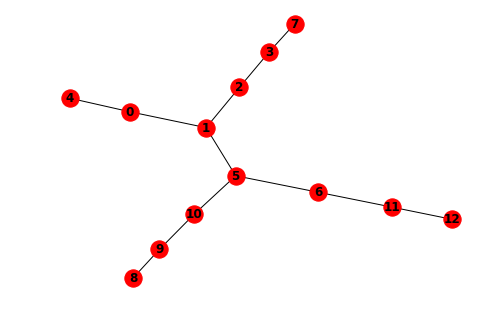

In [5]:
# Resposta da BFS
G1 = nx.Graph()
for i in range(n):
    G1.add_node(i)

# Acrescentando a arvore em largura
for i in range(n):
    if(pai[i] != -1):
        G1.add_edge(pai[i], i)
        
# Desenho de G1
nx.draw(G1, with_labels=True, font_weight='bold')
plt.show()

### Exercício

* Implemente uma função, baseada na BFS, que verifica se um grafo não-direcionado e não-ponderado é um **grafo bipartido**.  